In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = "../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv(PATH + "CompleteDataset.csv")
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [4]:
def clean(x):
    if x >= 0.03 and x <= 500: return x
    return np.nan

In [5]:
df["O3"] = df["O3"].apply(clean)

In [6]:
df["O3"].describe()

count    1519.000000
mean       21.818788
std        14.653507
min         0.083333
25%         9.062500
50%        23.208333
75%        32.480769
max       133.750000
Name: O3, dtype: float64

In [7]:
df["WindDirection"].describe()

count    2341.000000
mean      139.868005
std        92.208103
min         0.000000
25%        27.000000
50%       179.000000
75%       215.000000
max       359.000000
Name: WindDirection, dtype: float64

In [8]:
df["WindDirectionRad"] = np.radians(df["WindDirection"])

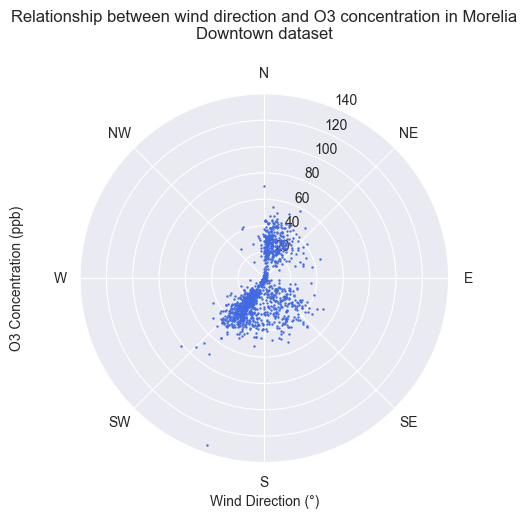

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
ax.scatter(df["WindDirectionRad"], df["O3"], s=0.5, color='royalblue')

ax.set_theta_zero_location('N')  # 0° en la parte superior
ax.set_theta_direction(-1)  # Sentido horario

ax.set_title("Relationship between wind direction and O3 concentration in Morelia\nDowntown dataset", pad=20)
ax.set_xlabel("Wind Direction (°)") 
ax.set_ylabel("O3 Concentration (ppb)", labelpad=40)
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.show()